# RL agent learning IBL task 

### Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Functions

In [3]:
def choose_state(states):
  state = np.random.choice(states)
  return state


def softmax(Q, state, beta):

  ''' Samples action based on the softmax policy for a given state and Q table
  '''
  # Get all actions and corresponding policy (p(a|s))
  actions = np.arange(0, len(Q[state, :]), 1)
  pi = np.zeros(len(actions))

  for a, action in enumerate(actions):
    pi[a] = policy(Q, action, state, beta=beta)

  # Sample from all possible actions according to the policy
  sampled_action = np.random.choice(actions, p=pi)

  return sampled_action


def policy(Q, action, state, beta):

  ''' Computes pi(a|s) for a given state - action pair
  '''
  pi = np.exp(beta * Q[state, action]) / np.sum(np.exp(beta * Q[state, :]))

  return pi




## Hard (classical) Reinforcement Learning algorithm

In [31]:
def ReinforcementLearning(states, actions, rewards, alpha, num_episode, beta):
    """ 
    Run Q-learning loop for num_episode iterations or till difference between Q is below min_difference.
    """

    # Initialize variables
    Q = np.zeros(np.shape(rewards))
    V = np.zeros(len(states))

    error_Q = np.zeros((len(states), len(actions), num_episode))
    error_V = np.zeros((len(states), num_episode))
    Q_iter = np.zeros((len(states), len(actions), num_episode))
    V_iter = np.zeros((len(states), num_episode))
    reward_count = np.zeros((num_episode))
    

    # Initialize state
    curr_state = choose_state(states)

    for i in range(num_episode):
                
        # Take an action according to chosen policy
        action = softmax(Q, curr_state, beta)

        # Determine next state
        next_state = choose_state(states)

        # Update value of current action-state pair (Q)
        error_Q[curr_state, action, i] = rewards[curr_state][action] - Q[curr_state][action]
        Q[curr_state][action] = Q[curr_state][action] + alpha * (error_Q[curr_state, action, i])

        # Update value of current state (V)
        error_V[curr_state, i] = rewards[curr_state][action] - V[curr_state]
        V[curr_state] = V[curr_state] + alpha * (error_V[curr_state, i])

        # Save rewards for performance calculation
        reward_count[i] = rewards[curr_state][action]

        # Save learning
        if i > 0:
            # Bring back values from the previous iteration (counter-factual updating)
            Q_iter[:, :, i] = Q_iter[:, :, i-1] 
            V_iter[:, i] = V_iter[:, i-1]

        Q_iter[curr_state, action, i] = Q[curr_state][action]
        V_iter[curr_state, i] = V[curr_state]


        # Make next state be current one on next episode
        curr_state = next_state.copy()

    return Q, error_Q, V, error_V, Q_iter, V_iter, reward_count


## Learn using Soft RL

In [21]:
# Constant parameters
alpha = 0.001
num_episode = 50000  # For the purpose of speeding up the process, less iterations were used
beta = 10

# Task structure
states = [0, 1]
actions = [0, 1]
rewards = [[1, 0], [0, 1]]  

In [32]:
Q, error_Q, V, error_V, Q_iter, V_iter, reward_count = ReinforcementLearning(states, actions, rewards, alpha, num_episode, beta)  


### Optimal and learned values

Text(0, 0.5, 'V-values')

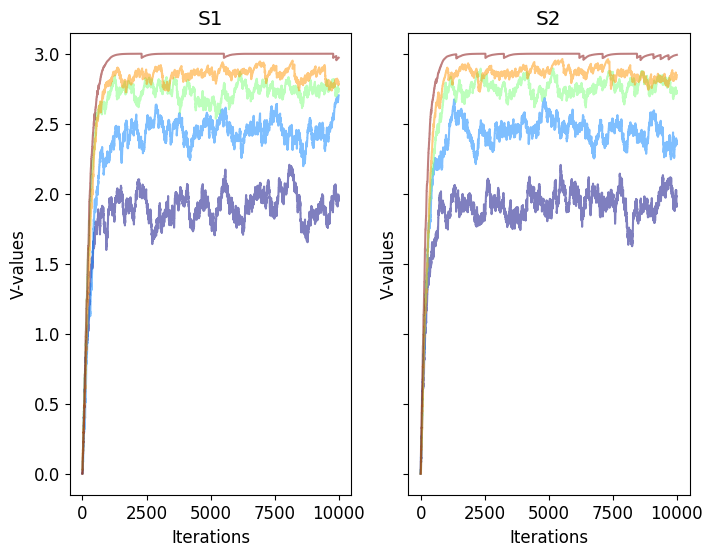

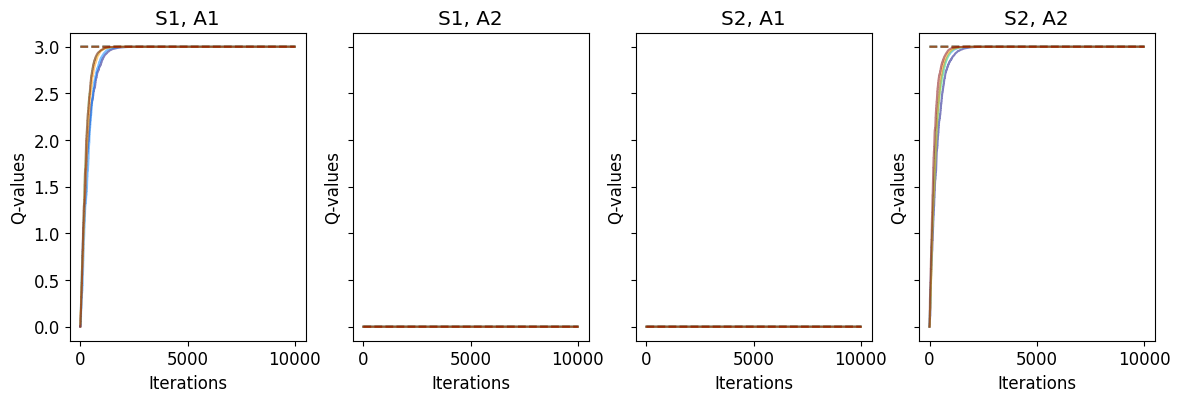

In [17]:
# Constant parameters
alpha = 0.01
num_episode = 10000  # For the purpose of speeding up the process, less iterations were used
state_prob = 0.5

# Task structure
states = [0, 1]
actions = [0, 1]
rewards = [[1, 0], [0, 1]]  # High control 

# Figure for Q and U values
#fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=[12, 8])
#fig2, ax2 = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=[8, 6])
fig3, ax3 = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=[8, 6])
fig4, ax4 = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=[14, 4])

# Loop over different betas
betas = [0.2, 0.5, 0.8, 1, 2]
beta_colors = plt.cm.jet(np.linspace(0,1,len(betas)))

# Initialize arrays for saving optimal values
Q_opt = np.array(rewards)
V_opt = np.zeros((len(states), len(betas))) * np.nan

for b, beta in enumerate(betas):
      

    # Learn V, Q, A and U values
    Q, error_Q, V, error_V, Q_iter, V_iter = ReinforcementLearning(states, actions, rewards, alpha, num_episode, beta)  

    # PLOT FOR EACH BETA
    # Plot Q across iterations
    ax4[0].plot(np.arange(0, num_episode, 1), Q_iter[0, 0, :], label=str(str('Beta = ') + str(beta)),alpha=0.5,  color=beta_colors[b])
    ax4[0].set_title('S1, A1')
    # Plot Q optimal 
    ax4[0].plot(np.arange(0, num_episode, 1), np.array([Q_opt[0, 0]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])
    # Plot Q across iterations
    ax4[1].plot(np.arange(0, num_episode, 1), Q_iter[0, 1, :], label=str(str('Beta = ') + str(beta)),alpha=0.5,  color=beta_colors[b])
    ax4[1].set_title('S1, A2')
    # Plot Q optimal 
    ax4[1].plot(np.arange(0, num_episode, 1), np.array([Q_opt[0, 1]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])
    # Plot A across iterations
    ax4[2].plot(np.arange(0, num_episode, 1), Q_iter[1, 0, :], label=str(str('Beta = ') + str(beta)),alpha=0.5,  color=beta_colors[b])
    ax4[2].set_title('S2, A1')
    # Plot Q optimal 
    ax4[2].plot(np.arange(0, num_episode, 1), np.array([Q_opt[1, 0]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])
    # Plot Q across iterations
    ax4[3].plot(np.arange(0, num_episode, 1), Q_iter[1, 1, :], label=str(str('Beta = ') + str(beta)),alpha=0.5,  color=beta_colors[b])
    ax4[3].set_title('S2, A2')
    # Plot Q optimal 
    ax4[3].plot(np.arange(0, num_episode, 1), np.array([Q_opt[1, 1]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])


    # Plot V across iterations
    ax3[0].plot(np.arange(0, num_episode, 1), V_iter[0, :], label=str(str('Beta = ') + str(beta)),alpha=0.5,  color=beta_colors[b])
    ax3[0].set_title('S1')
    ## Plot V optimal 
    #ax3[0].plot(np.arange(0, num_episode, 1), np.array([V_opt[0, b]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])
    # Plot V across iterations
    ax3[1].plot(np.arange(0, num_episode, 1), V_iter[1, :], label=str(str('Beta = ') + str(beta)), alpha=0.5,  color=beta_colors[b])
    ax3[1].set_title('S2')
    ## Plot V optimal 
    #ax3[1].plot(np.arange(0, num_episode, 1), np.array([V_opt[1, b]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])


# Add labels to plots

ax4[0].set_xlabel('Iterations')
ax4[1].set_xlabel('Iterations')
ax4[2].set_xlabel('Iterations')
ax4[3].set_xlabel('Iterations')

ax4[0].set_ylabel('Q-values')
ax4[1].set_ylabel('Q-values')
ax4[2].set_ylabel('Q-values')
ax4[3].set_ylabel('Q-values')


ax3[0].set_xlabel('Iterations')
ax3[1].set_xlabel('Iterations')
ax3[0].set_ylabel('V-values')
ax3[1].set_ylabel('V-values')



Text(0, 0.5, 'V-values')

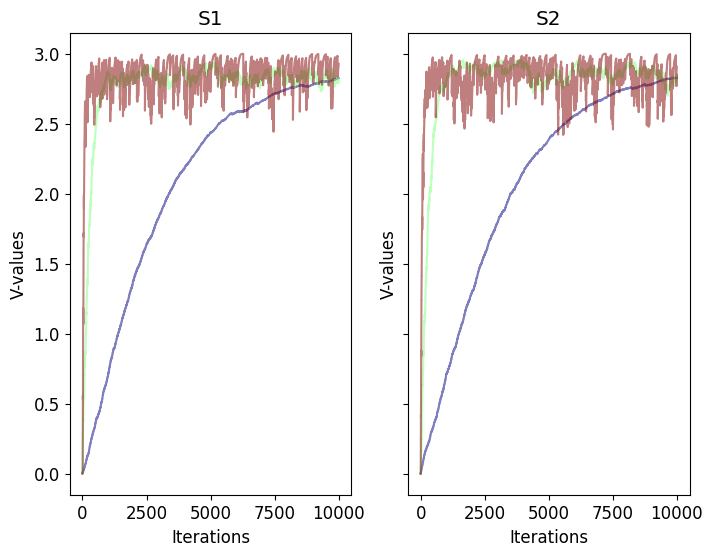

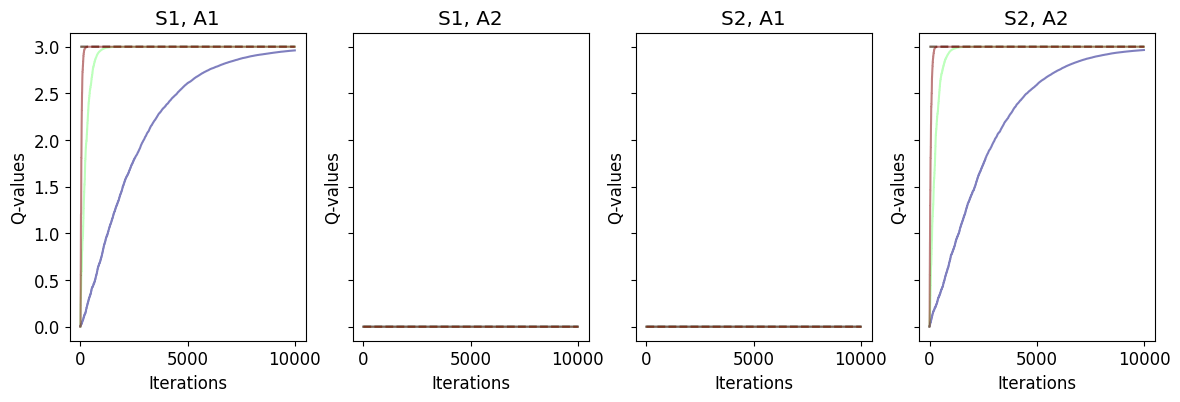

In [18]:
# Constant parameters
beta = 1
num_episode = 10000  # For the purpose of speeding up the process, less iterations were used
state_prob = 0.5

# Task structure
states = [0, 1]
actions = [0, 1]
rewards = [[3, 0], [0, 3]]  # High control 

# Figure for Q and U values

fig3, ax3 = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=[8, 6])
fig4, ax4 = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=[14, 4])

# Loop over different betas
alphas = [0.001, 0.01, 0.05]
alpha_colors = plt.cm.jet(np.linspace(0,1,len(alphas)))

# Initialize arrays for saving optimal values
Q_opt = np.array(rewards)

for a, alpha in enumerate(alphas):
      

    # Learn V, Q, A and U values
    Q, error_Q, V, error_V, Q_iter, V_iter, reward_count = ReinforcementLearning(states, actions, rewards, alpha, num_episode, beta)  

    # PLOT FOR EACH BETA
    # Plot Q across iterations
    ax4[0].plot(np.arange(0, num_episode, 1), Q_iter[0, 0, :], label=str(str('Alpha = ') + str(alpha)),alpha=0.5,  color=alpha_colors[a])
    ax4[0].set_title('S1, A1')
    # Plot Q optimal 
    ax4[0].plot(np.arange(0, num_episode, 1), np.array([Q_opt[0, 0]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Alpha = ') + str(alpha)), color=alpha_colors[a])
    # Plot Q across iterations
    ax4[1].plot(np.arange(0, num_episode, 1), Q_iter[0, 1, :], label=str(str('Alpha = ') + str(alpha)),alpha=0.5,  color=alpha_colors[a])
    ax4[1].set_title('S1, A2')
    # Plot Q optimal 
    ax4[1].plot(np.arange(0, num_episode, 1), np.array([Q_opt[0, 1]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Alpha = ') + str(alpha)), color=alpha_colors[a])
    # Plot A across iterations
    ax4[2].plot(np.arange(0, num_episode, 1), Q_iter[1, 0, :], label=str(str('Alpha = ') + str(alpha)),alpha=0.5,  color=alpha_colors[a])
    ax4[2].set_title('S2, A1')
    # Plot Q optimal 
    ax4[2].plot(np.arange(0, num_episode, 1), np.array([Q_opt[1, 0]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Alpha = ') + str(alpha)), color=alpha_colors[a])
    # Plot Q across iterations
    ax4[3].plot(np.arange(0, num_episode, 1), Q_iter[1, 1, :], label=str(str('Alpha = ') + str(alpha)), alpha=0.5, color=alpha_colors[a])
    ax4[3].set_title('S2, A2')
    # Plot Q optimal 
    ax4[3].plot(np.arange(0, num_episode, 1), np.array([Q_opt[1, 1]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Alpha = ') + str(alpha)), color=alpha_colors[a])


    # Plot V across iterations
    ax3[0].plot(np.arange(0, num_episode, 1), V_iter[0, :], label=str(str('Alpha = ') + str(alpha)),alpha=0.5,  color=alpha_colors[a])
    ax3[0].set_title('S1')
    ## Plot V optimal 
    #ax3[0].plot(np.arange(0, num_episode, 1), np.array([V_opt[0, b]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])
    # Plot V across iterations
    ax3[1].plot(np.arange(0, num_episode, 1), V_iter[1, :], label=str(str('Alpha = ') + str(alpha)), alpha=0.5,  color=alpha_colors[a])
    ax3[1].set_title('S2')
    ## Plot V optimal 
    #ax3[1].plot(np.arange(0, num_episode, 1), np.array([V_opt[1, b]] * num_episode),  linestyle='dashed', alpha=0.5, label=str(str('Beta = ') + str(beta)), color=beta_colors[b])


# Add labels to plots

ax4[0].set_xlabel('Iterations')
ax4[1].set_xlabel('Iterations')
ax4[2].set_xlabel('Iterations')
ax4[3].set_xlabel('Iterations')

ax4[0].set_ylabel('Q-values')
ax4[1].set_ylabel('Q-values')
ax4[2].set_ylabel('Q-values')
ax4[3].set_ylabel('Q-values')


ax3[0].set_xlabel('Iterations')
ax3[1].set_xlabel('Iterations')
ax3[0].set_ylabel('V-values')
ax3[1].set_ylabel('V-values')



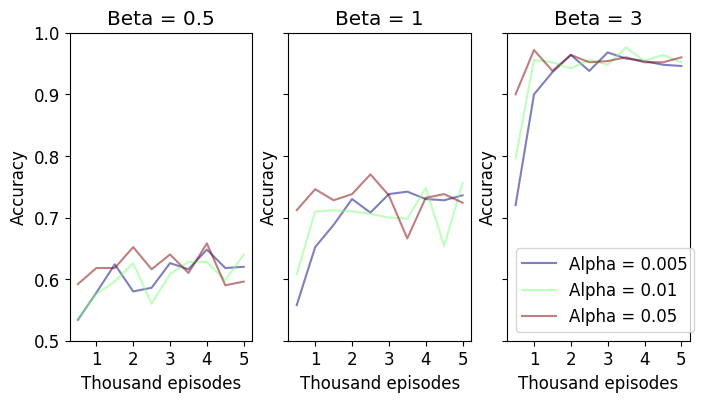

In [63]:

num_episode = 5000  # For the purpose of speeding up the process, less iterations were used
state_prob = 0.5

# Task structure
states = [0, 1]
actions = [0, 1]
rewards = [[1, 0], [0, 1]]  # High control 

# Loop over different betas and alphas
betas = [0.5, 1, 3]
beta_colros = plt.cm.jet(np.linspace(0,1,len(betas)))

alphas = [0.005, 0.01, 0.05]
alpha_colors = plt.cm.jet(np.linspace(0,1,len(alphas)))

# Figure 
fig, ax = plt.subplots(nrows=1, ncols=len(betas), sharex=True, sharey=True, figsize=[8, 4])

for b, beta in enumerate(betas):

    for a, alpha in enumerate(alphas):
        
        # Learn V, Q, A and U values
        Q, error_Q, V, error_V, Q_iter, V_iter, reward_count = ReinforcementLearning(states, actions, rewards, alpha, num_episode, beta)  

        # Initialize arrays for saving optimal values
        bin_number = 10
        performance = np.zeros((bin_number))
        bin_size = np.floor(len(reward_count)/bin_number)

        for bi, bin in enumerate(range(bin_number)):
            bin_start = int(bi*bin_size)
            bin_end = int(bi*bin_size + bin_size)
            performance[bi] = np.sum(reward_count[bin_start: bin_end]) / len(reward_count[bin_start: bin_end])

        # PLOT FOR EACH ALPHA

        # Plot V across iterations
        ax[b].plot(np.arange(0, bin_number, 1), performance, label=str(str('Alpha = ') + str(alpha)),alpha=0.5,  color=alpha_colors[a])
        ax[b].set_title(str('Beta = ' + str(beta)))
        if b+1 == len(betas): 
            leg = ax[b].legend()

    # Add labels to plots

    ax[b].set_xlabel('Thousand episodes')
    ax[b].set_ylabel('Accuracy')
    ax[b].set_ylim([0.5, 1])
    ax[b].set_xticks([1, 3, 5, 7, 9]) 
    ax[b].set_xticklabels([1, 2, 3, 4, 5], fontsize=12)